In [15]:
import pandas as pd
import shap 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
# Load data
data = pd.read_csv('dataset_1.csv')
data = data.drop("Unnamed: 0", axis=1)

# Split data into features (X) and target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest classifier on the original feature set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Print the feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rfc.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances.head(10))

# Use the Random Forest classifier for feature selection
rfc_feature_selection = RandomForestClassifier()
rfc_feature_selection.fit(X_train, y_train)

# Get the feature importances
importances = rfc_feature_selection.feature_importances_

# Sort the features by importance
indices = importances.argsort()[::-1]

# Select the top k features
k = 8
X_new = X.iloc[:, indices[:k]]

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)



# Train a new Random Forest classifier on the selected feature set
rfc_new = RandomForestClassifier()
rfc_new.fit(X_train_new, y_train)

# Evaluate the model on the test set
accuracy = rfc_new.score(X_test_new, y_test)
print('Accuracy with {} features: {}'.format(k, accuracy))


                                Feature  Importance
5  LastStatementMinimumPaymentDueAmount    0.423957
2            LastStatementBalanceAmount    0.190061
7                    CardExternalStatus    0.147170
6       LastStatementPaymentTotalAmount    0.111712
3           LastStatementPurchaseAmount    0.067311
1                            CreditLine    0.051532
0                              CardType    0.005177
4     LastStatementPurchaseReturnAmount    0.003081
Accuracy with 8 features: 1.0


In [33]:
# Using Shap to find the feature contribution
explainer = shap.Explainer(rfc.predict_proba, X)
shap_values = explainer(X_test)

Exact explainer: 225it [00:22,  5.57it/s]                                                                              


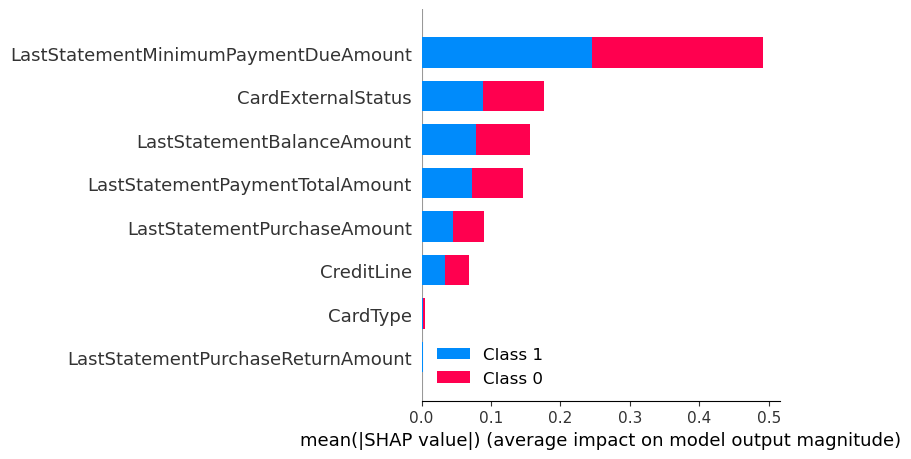

In [37]:
# Perforing SHAP operations and plots

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
